In [1]:
#importing all the packages
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
train=pd.read_csv('C://Users//Gowrav Tata//Data Science//Kaggle//digit-recognizer//train.csv')
test=pd.read_csv('C://Users//Gowrav Tata//Data Science//Kaggle//digit-recognizer//test.csv')

In [3]:
X_train = train.iloc[:, 1:785].values
Y_train = train.iloc[:, 0].values
X_test = test.iloc[:, 0:784].values

In [4]:
#Looking the shape of the data 
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(42000, 784)
(42000,)
(28000, 784)


In [5]:
X_train,X_test=X_train/255.0,X_test/255.0

In [6]:
#reshaping to format  which CNN expects (batch,height,width,channels)
X_train = X_train.reshape(42000, 28, 28, 1)
X_test = X_test.reshape(28000, 28, 28, 1)
Y_train = to_categorical(Y_train, 10)

# In the case of MNIST everything was explicit, we need not reproduce a validation , while here it has to be done manually.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size = 0.2, random_state=44)

In [8]:
print(X_train.shape)
print(X_validation.shape)
print(Y_train.shape)
print(Y_validation.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(33600, 10)
(8400, 10)


In [9]:
#Initiating the model
model=Sequential()

In [10]:
#Convolution Layers
model.add(Conv2D(32, kernel_size = (3,3), input_shape= (28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
#fully connected layers
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))

In [12]:
#compiling
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
__________

In [14]:
model.fit(X_train,Y_train,epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





33600/33600 [==============================] - 43s 1ms/step - loss: 0.2436 - acc: 0.9226
Epoch 2/10
33600/33600 [==============================] - 40s 1ms/step - loss: 0.0800 - acc: 0.9763
Epoch 3/10
33600/33600 [==============================] - 41s 1ms/step - loss: 0.0561 - acc: 0.9821
Epoch 4/10
33600/33600 [==============================] - 47s 1ms/step - loss: 0.0480 - acc: 0.9852: 0s - loss: 0.0479 - acc:
Epoch 5/10
33600/33600 [==============================] - 41s 1ms/step - loss: 0.0399 - acc: 0.9875
Epoch 6/10
33600/33600 [==============================] - 41s 1ms/step - loss: 0.0343 - acc: 0.9892
Epoch 7/10
33600/33600 [==============================] - 34s 1ms/step - loss: 0.0309 - acc: 0.9901
Epoch 8/10
33600/33600 [==============================] - 28s 846us/step - loss: 0.0269 - acc: 0.99210s - loss: 0.0270 - acc: 0.
Epoch 9/10
33600/33600 [===================

In [15]:
loss , accuracy = model.evaluate(X_validation, Y_validation)
print("Loss : ",loss, "Accuracy : ", accuracy)

8400/8400 [==============================] - 1s 133us/step
Loss :  0.04434715632172421 Accuracy :  0.9898809523809524


In [16]:
predicted_classes = model.predict_classes(X_test)

In [17]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predicted_classes)+1)), "Label": predicted_classes})

In [18]:
submissions.to_csv("submission.csv", index = False, header = True)

# Inference

In [19]:
test_image=X_test[300]

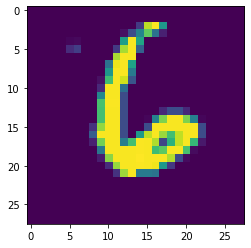

In [20]:
plt.imshow(X_test[300].reshape(28,28))

In [21]:
#test_image=np.asarray(test_image)
test_image=test_image.reshape(1,28,28,1)
result=model.predict(test_image)
(np.round(result)).argmax()

6

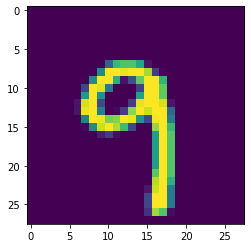

In [22]:
plt.imshow(X_test[400].reshape(28,28))

In [23]:
(np.round(model.predict(X_test[400].reshape(1,28,28,1)))).argmax()

9